 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = pd.read_csv (r'..\python-homework1\whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_csv.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv = pd.read_csv (r'..\python-homework1\algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_csv.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csv = pd.read_csv (r'..\python-homework1\sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
sp500_csv.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_csv["Close"] = sp500_csv["Close"].str.replace("$", "")
sp500_csv["Close"] = sp500_csv["Close"].str.replace(",", "")
sp500_csv["Close"] = sp500_csv["Close"].astype("float")
sp500_csv.rename({"Close" : "S&P 500"}, axis=1, inplace=True)


sp500_csv.head()

<ipython-input-10-407eff28d954>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_csv["Close"] = sp500_csv["Close"].str.replace("$", "")


,S&P 500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_dailyret = sp500_csv["S&P 500"].pct_change()

In [12]:
# Drop nulls
sp500_dailyret.dropna(inplace=True)
sp500_dailyret

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: S&P 500, Length: 1648, dtype: float64

In [13]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_csv, algo_csv, sp500_dailyret], axis="columns", join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

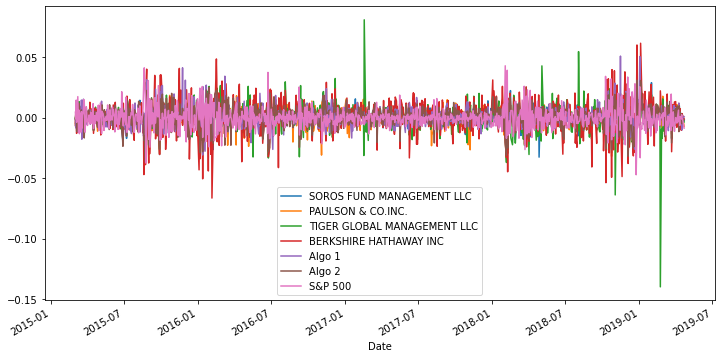

In [15]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(12, 6))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

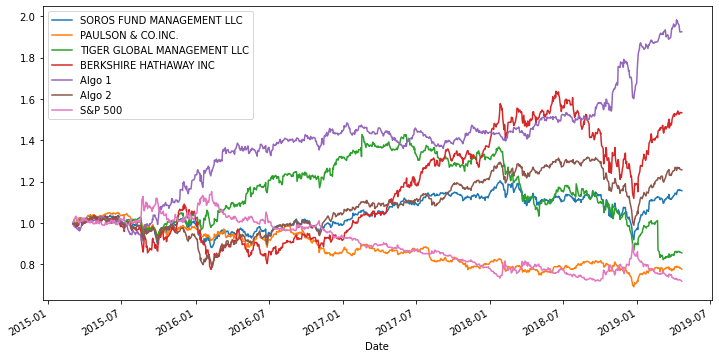

In [16]:
# Calculate cumulative returns of all portfolios
all_returns_c = (all_returns + 1).cumprod()
# Plot cumulative returns
all_returns_c.plot(figsize=(12, 6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

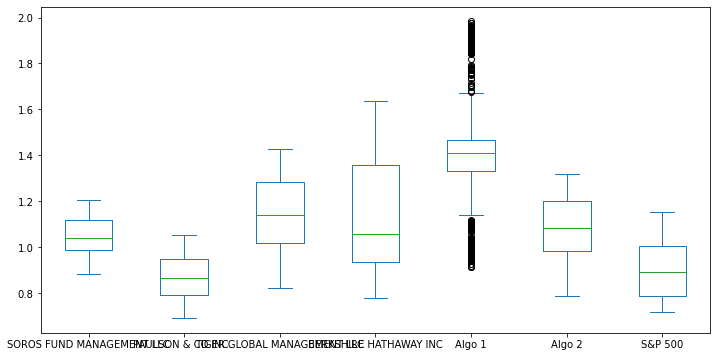

In [17]:
all_returns_c.plot(kind='box', figsize=(12, 6))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_returns_c.std()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
S&P 500                        0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500
sp500_dailyret.std()

# Determine which portfolios are riskier than the S&P 500
i = (f'Tiger Global, Berkshire Hathaway, and according to the individual figure below of the standard deviation of the SP500, Algo 2 are all riskier than the S&P 500')
print(i)

Tiger Global, Berkshire Hathaway, and according to the individual figure below of the standard deviation of the SP500, Algo 2 are all riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
sp500_dailyret.std() * np.sqrt(252)

0.12913344822666864

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

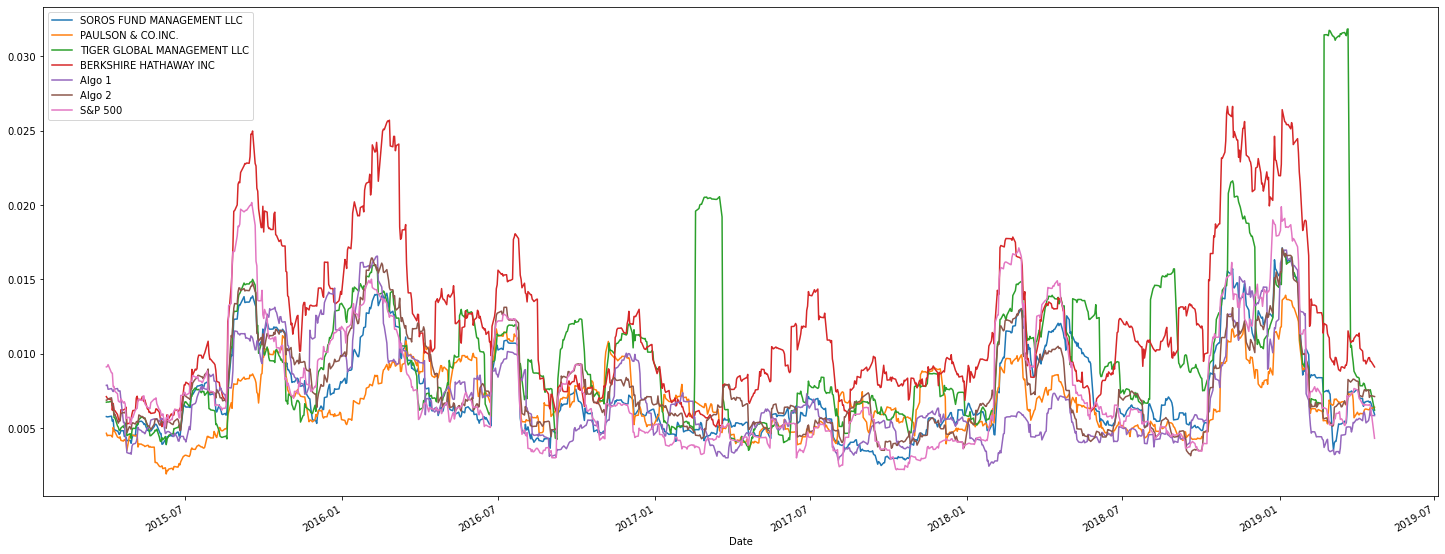

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(25,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
corr_df = all_returns.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="winter")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'30-Day Beta Trend of Berkshire Hathaway Inc. vs. S&P 500 Returns'}, xlabel='Date'>

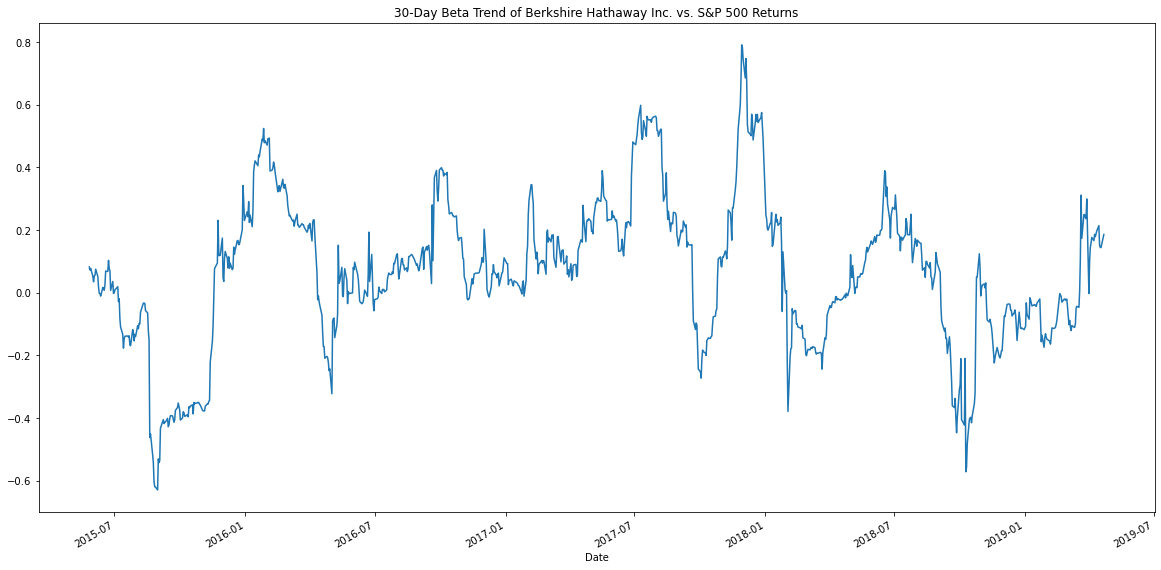

In [23]:
# Calculate covariance of a single portfolio

covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
covariance

# Calculate variance of S&P 500

variance = all_returns['S&P 500'].var()
variance

# Computing beta

beta = covariance / variance
beta

# Plot beta trend

rolling_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='30-Day Beta Trend of Berkshire Hathaway Inc. vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

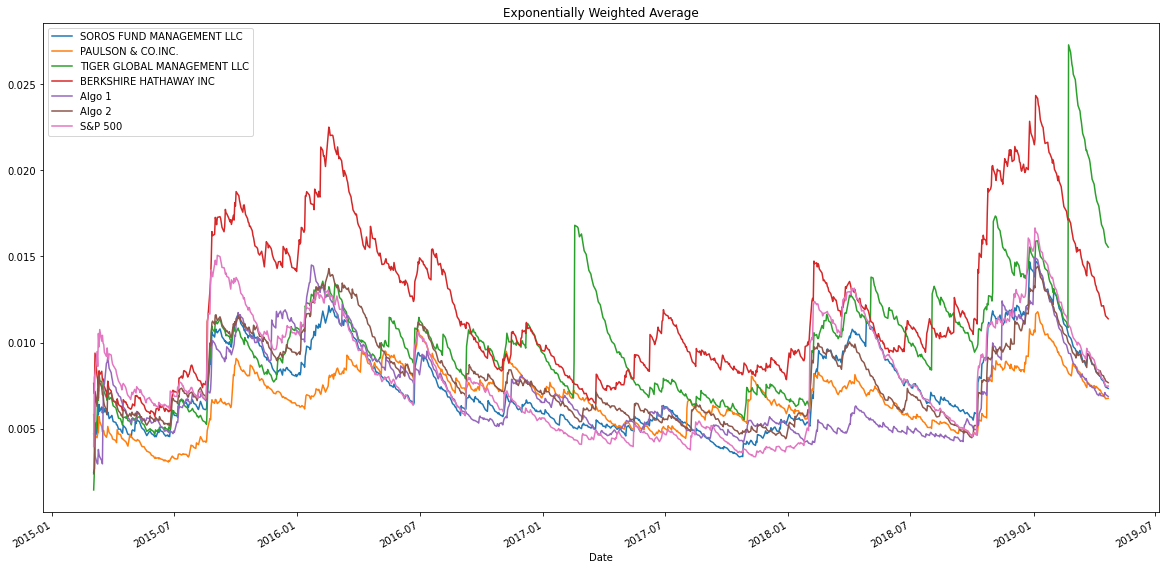

In [24]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252)))

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}>

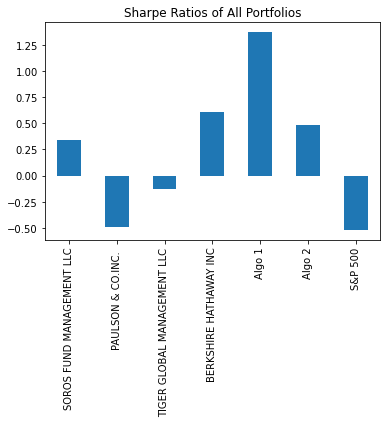

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of All Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algo 1 & 2 portfolios seem to outperform both the S&P 500 as well as the Whales, however, Algo 2 underperformed when compared to Algo 1 and Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
fubo_df = pd.read_csv (r'..\python-homework1\fubo_stock.csv')
fubo_df.columns = ['Date', 'FUBO']
fubo_df

,Date,FUBO
0,1/5/2015 16:00:00,221999.82
1,1/13/2015 16:00:00,194999.82
2,1/15/2015 16:00:00,209999.79
3,1/20/2015 16:00:00,209999.79
4,1/21/2015 16:00:00,299999.70
...,...,...
798,7/15/2019 16:00:00,8.10
799,7/22/2019 16:00:00,7.55
800,7/23/2019 16:00:00,7.54
801,7/24/2019 16:00:00,7.50


In [28]:
# Reading data from 2nd stock
amd_df = pd.read_csv (r'..\python-homework1\amd_stock.csv')
amd_df.drop('Date', axis=1, inplace=True)
amd_df.columns = ['AMD']
amd_df

,AMD
0,2.67
1,2.76
2,2.85
3,3.31
4,3.03
...,...
1124,32.85
1125,33.49
1126,34.11
1127,33.67


In [29]:
# Reading data from 3rd stock
atvi_df = pd.read_csv (r'..\python-homework1\atvi_stock.csv')
atvi_df.drop('Date', axis=1, inplace=True)
atvi_df.columns = ['ATVI']
atvi_df

,ATVI
0,20.13
1,19.85
2,19.48
3,19.06
4,19.25
...,...
1146,46.86
1147,47.19
1148,47.99
1149,48.45


In [30]:
# Combine all stocks in a single DataFrame
all_returns_cust = pd.concat([fubo_df, amd_df, atvi_df], axis="columns", join='inner')
all_returns_cust

,Date,FUBO,AMD,ATVI
0,1/5/2015 16:00:00,221999.82,2.67,20.13
1,1/13/2015 16:00:00,194999.82,2.76,19.85
2,1/15/2015 16:00:00,209999.79,2.85,19.48
3,1/20/2015 16:00:00,209999.79,3.31,19.06
4,1/21/2015 16:00:00,299999.70,3.03,19.25
...,...,...,...,...
798,7/15/2019 16:00:00,8.10,9.77,73.92
799,7/22/2019 16:00:00,7.55,10.02,74.07
800,7/23/2019 16:00:00,7.54,9.61,76.81
801,7/24/2019 16:00:00,7.50,9.53,78.22


In [31]:
# Reset Date index
#all_returns_cust.set_index('Date')
all_returns_cust['Date'] = pd.to_datetime(all_returns_cust['Date']).dt.date
all_returns_cust.set_index('Date', inplace=True)

In [32]:
# Reorganize portfolio data by having a column per symbol
all_returns_cust

,FUBO,AMD,ATVI
Date,,,
2015-01-05,221999.82,2.67,20.13
2015-01-13,194999.82,2.76,19.85
2015-01-15,209999.79,2.85,19.48
2015-01-20,209999.79,3.31,19.06
2015-01-21,299999.70,3.03,19.25
...,...,...,...
2019-07-15,8.10,9.77,73.92
2019-07-22,7.55,10.02,74.07
2019-07-23,7.54,9.61,76.81


<AxesSubplot:xlabel='Date'>

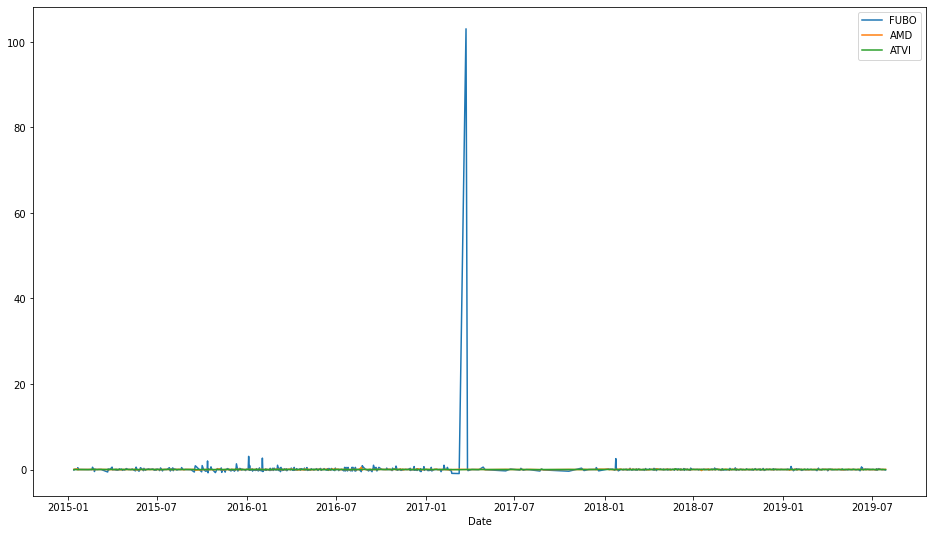

In [33]:
# Calculate daily returns
all_returns_cust["FUBO"] = all_returns_cust["FUBO"].pct_change()
all_returns_cust["AMD"] = all_returns_cust["AMD"].pct_change()
all_returns_cust["ATVI"] = all_returns_cust["ATVI"].pct_change()

# Drop NAs

all_returns_cust.dropna(inplace=True)

# Display sample data

all_returns_cust.plot(figsize=(16,9))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

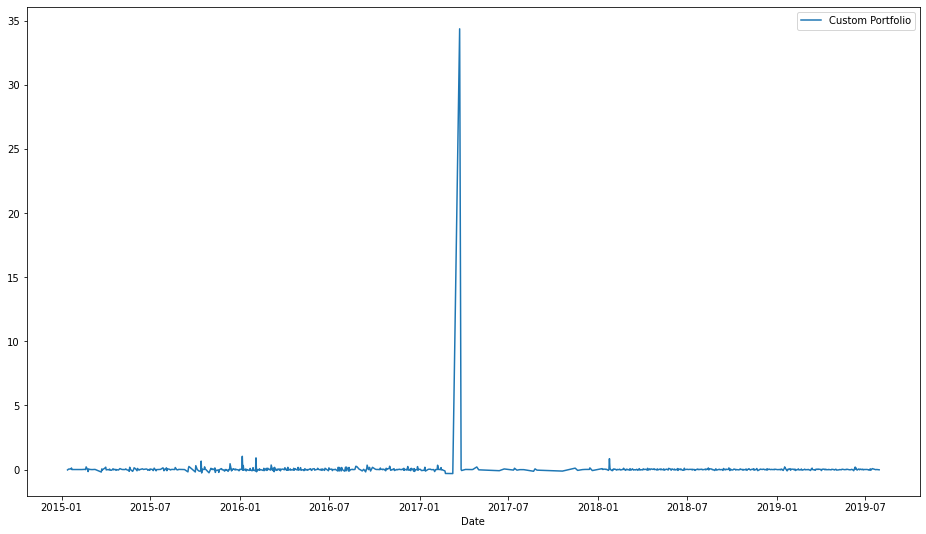

In [43]:
# Set weights

cust_port_weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

cust_w_ret = (all_returns_cust * cust_port_weights)
cust_port_ret = cust_w_ret.sum(axis=1)
cust_portfolio = cust_port_ret.to_frame()
cust_portfolio.columns = ['Custom Portfolio']

# Display sample data
cust_portfolio.plot(figsize=(16,9))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_total = pd.concat([whale_csv, sp500_dailyret, cust_portfolio], axis="columns", join='outer')
all_returns_total.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Custom Portfolio
Date,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,-0.000872,NaN
2012-10-02,NaN,NaN,NaN,NaN,-0.003611,NaN
2012-10-03,NaN,NaN,NaN,NaN,-0.007123,NaN
2012-10-04,NaN,NaN,NaN,NaN,0.000322,NaN
2012-10-05,NaN,NaN,NaN,NaN,0.003469,NaN


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_total.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Custom Portfolio
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.006990
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.006384
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,0.001921,0.007602
2015-03-11,0.004012,0.005163,0.003312,-0.001147,-0.012445,-0.005095
2015-03-23,-0.000067,-0.000513,-0.000109,0.000591,0.006177,-0.196372
...,...,...,...,...,...,...
2019-04-12,0.005663,-0.001165,0.004217,0.007316,0.000630,-0.014898
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.011472
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,0.011266


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
all_returns_total.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC       0.124487
PAULSON & CO.INC.               0.110754
TIGER GLOBAL MANAGEMENT LLC     0.171830
BERKSHIRE HATHAWAY INC          0.203682
S&P 500                         0.129133
Custom Portfolio               19.314850
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

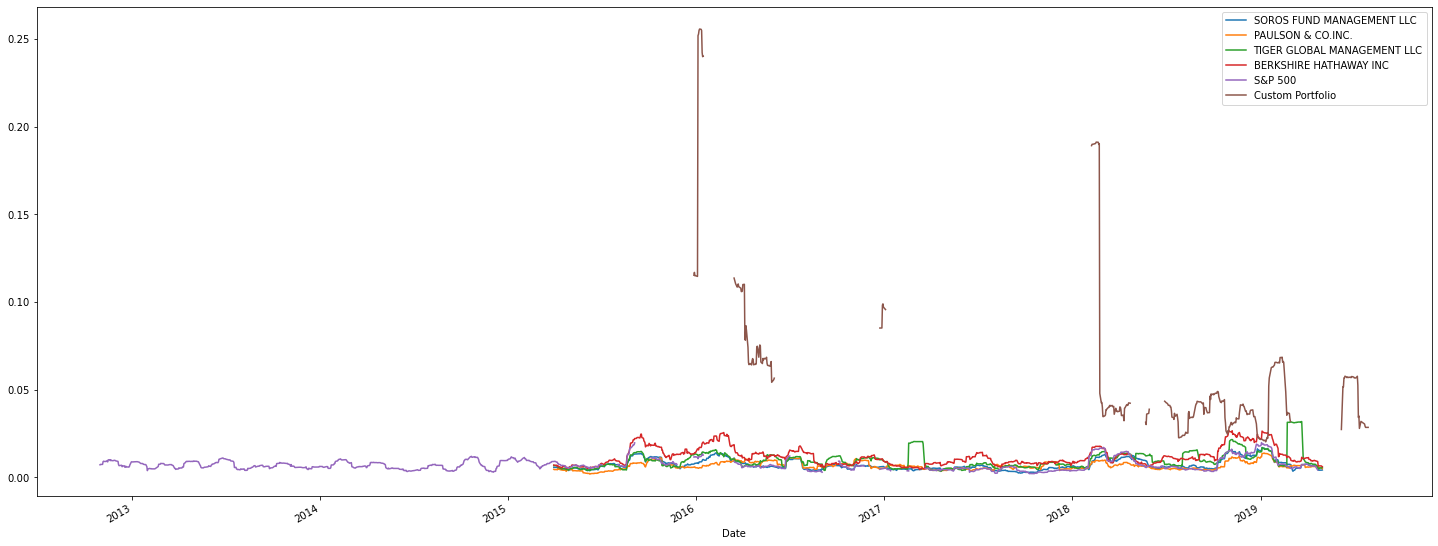

In [38]:
# Calculate rolling standard deviation
all_returns_total.rolling(window=21).std()
# Plot rolling standard deviation
all_returns_total.rolling(window=21).std().plot(figsize=(25,10))

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
corr_df_total = all_returns_total.corr()
corr_df_total.style.background_gradient(cmap="Greens")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.000574,0.007404
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.013549,-0.005472
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,-0.001505,-0.008825
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,-0.013856,-0.005800
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,0.006451
Custom Portfolio,0.007404,-0.005472,-0.008825,-0.005800,0.006451,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Beta Trend of Custom Portfolio vs. S&P 500 Returns'}, xlabel='Date'>

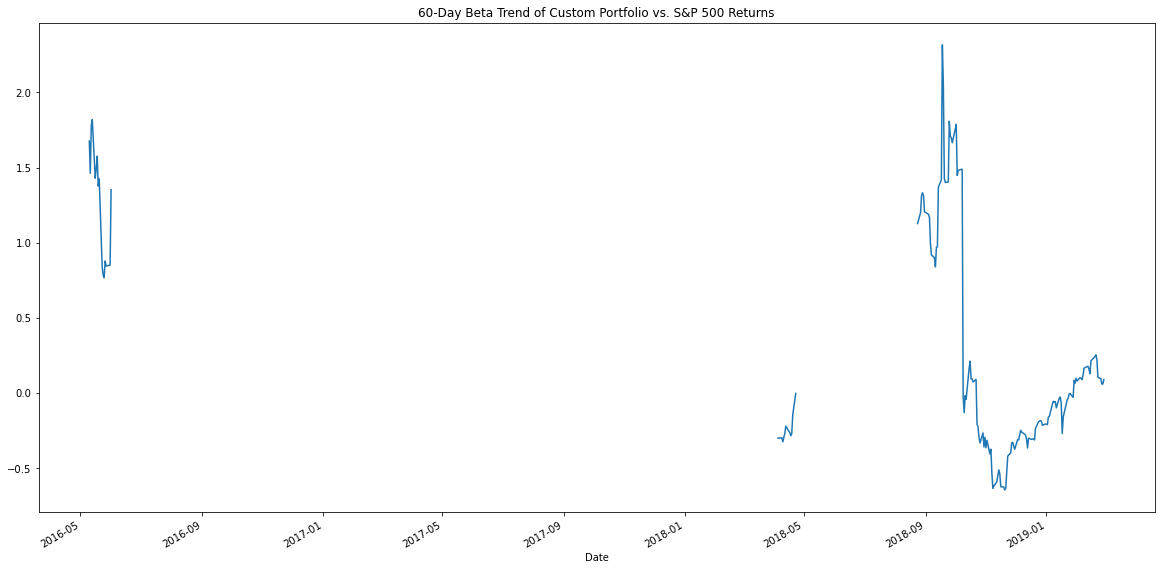

In [40]:
# Calculate and plot Beta

covariance_total = all_returns_total['Custom Portfolio'].cov(all_returns_total['S&P 500'])
covariance_total

variance_total = all_returns_total['S&P 500'].var()
variance_total

beta_total = covariance_total / variance_total
beta_total

rolling_covariance_total = all_returns_total['Custom Portfolio'].rolling(window=60).cov(all_returns_total['S&P 500'])
rolling_variance_total = all_returns_total['S&P 500'].rolling(window=60).var()
rolling_beta_total = rolling_covariance_total / rolling_variance_total
rolling_beta_total.plot(figsize=(20, 10), title='60-Day Beta Trend of Custom Portfolio vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_total = ((all_returns_total.mean() * 252) / (all_returns_total.std() * np.sqrt(252)))

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios VS Custom Portfolio'}>

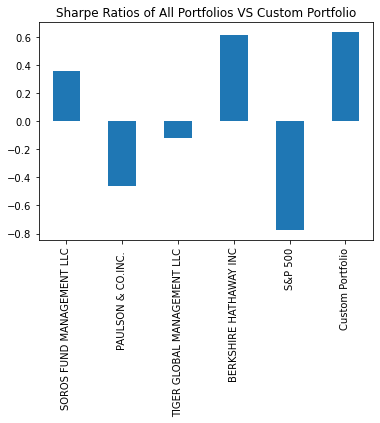

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_total.plot(kind="bar", title="Sharpe Ratios of All Portfolios VS Custom Portfolio")

### How does your portfolio do?

According to the Sharpe Ratios visualized as a bar plot, the custom porfolio of stocks seems to have outperformed against the S&P 500